In [107]:
%matplotlib inline

In [64]:
print(__doc__)
from time import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection)


Automatically created module for IPython interactive environment


In [105]:
plt.rcParams['figure.figsize']= 6.2,6.2

In [66]:
#Declaring a sed
np.random.seed(8)

In [67]:
import seaborn as sns; sns.set(color_codes=True)

In [68]:
#Reading all the cvs
#Nss learning
nsl_training=pd.read_csv('./Final_Datasets/MINMAX_FD_NSL_Tra.csv')
#Nsl testing
nsl_testing=pd.read_csv('./Final_Datasets/MINMAX_FD_NSL_Test.csv')


In [69]:
#NSL TESTING LABELS

#Index binary
L_nsl_testing_indexbinary=pd.read_csv("./Final_Datasets/L_nsl_testing_indexbinary.csv")
#Index by Group
L_nsl_testing_indexbygroup=pd.read_csv("./Final_Datasets/L_nsl_testing_indexbygroup.csv")
#Index tipe of attack
L_nsl_testing_indextipeofattack=pd.read_csv("./Final_Datasets/L_nsl_testing_indextipeofattack.csv")


#nsl TRAINING LABELS
L_nsl_training_indexbinary=pd.read_csv("./Final_Datasets/L_nsl_training_indexbinary.csv")
#Index by Group
L_nsl_training_indexbygroup=pd.read_csv("./Final_Datasets/L_nsl_training_indexbygroup.csv")
#Index tipe of attack
L_nsl_training_indextipeofattack=pd.read_csv("./Final_Datasets/L_nsl_training_indextipeofattack.csv")

In [70]:
def norm_min_max(X):
    '''Normalización Min-Max'''
    x_min,x_max=np.min(X,0),np.max(X,0)
    X=(X-x_min)/(x_max-x_min)
    return X

# Total: 

In [71]:
total=3500

# ---.---

In [72]:
#converting to numpy

In [73]:
X=nsl_training.values

In [74]:
X.shape

(125973, 40)

In [75]:
#Selecting just a fixed quantity of rows

In [76]:
total=3500
np.random.seed(8)
indice=np.random.choice(list(range(0,X.shape[0])), total)
indice

array([70083, 25940, 18417, ..., 85471, 85255, 66997])

In [77]:
X[70083,:]

array([ 0.        ,  0.        ,  0.31884058,  0.2       ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.4853229 ,  0.01174168,  0.        ,  0.        ,
        1.        ,  1.        ,  0.02      ,  0.07      ,  0.        ,
        1.        ,  0.02352941,  0.02      ,  0.08      ,  0.        ,
        0.        ,  0.        ,  0.        ,  1.        ,  1.        ])

In [78]:
X=X[indice,:]

# PCA MODEL

## Binary (2 classes)

## 1) PCA NSL-Training

In [79]:
#building the model and getting the 2 principal components
PCA_2_tra = decomposition.TruncatedSVD(n_components=2).fit_transform(X)

In [80]:
#Base de datos y normalizacion
Database=PCA_2_tra
Database=norm_min_max(Database)

In [81]:
#Reading the labels and converting to numpy
Labels=L_nsl_training_indexbinary.values.T
Labels=Labels[0,indice]

### Plotting Binary

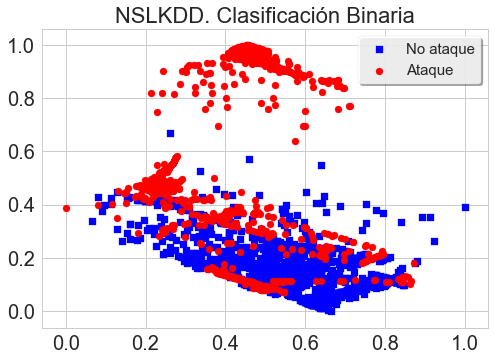

In [82]:
#Binary Classification
plt.rcParams['figure.figsize']= 6.2,6.2
sns.set_style('whitegrid')

plt.scatter(Database[Labels==0][:,0], Database[Labels==0][:,1], label='No ataque', c='blue',
            marker='s')
plt.scatter(Database[Labels==1][:,0], Database[Labels==1][:,1], label='Ataque', c='red')

plt.legend(prop={'size':15},frameon=True,shadow=True)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('NSLKDD. Clasificación Binaria',fontsize=22)


#ax.yaxis.label.set_size(40)
plt.savefig("./PCA_FP_minmax_nsl_2_classes.png", dpi=300)
plt.show()

## (5 classes)

In [83]:
#Reading the labels and converting to numpy
Labels=L_nsl_training_indexbygroup.values.T
Labels=Labels[0,indice]

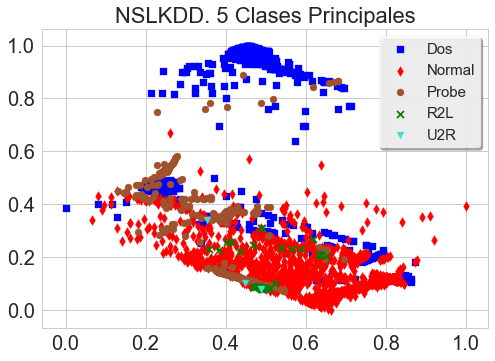

In [84]:
#five classes
plt.rcParams['figure.figsize']= 6.2,6.2
plt.scatter(Database[Labels==1][:,0], Database[Labels==1][:,1], label='Dos', c='blue',marker='s')
plt.scatter(Database[Labels==2][:,0], Database[Labels==2][:,1], label='Normal', c='red',marker='d')
plt.scatter(Database[Labels==3][:,0], Database[Labels==3][:,1], label='Probe', c='sienna',marker='o')
plt.scatter(Database[Labels==4][:,0], Database[Labels==4][:,1], label='R2L', c='green',marker='x')
plt.scatter(Database[Labels==5][:,0], Database[Labels==5][:,1], label='U2R', c='turquoise',marker='v')

plt.legend(prop={'size':15},frameon=True,shadow=True)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('NSLKDD. 5 Clases Principales',fontsize=22)
plt.savefig("PCA_FP_minmax_nsl_5_classes.png", dpi=300)
plt.show()

## 2.- PCA ENSL Testing

In [85]:
#Reading the Testing Dataset
#total=3500
X=nsl_testing.values
np.random.seed(8)
indice=np.random.choice(list(range(0,X.shape[0])), total)
X=X[indice,:]
indice

array([ 4547, 18417,  2181, ..., 19717,  5270, 22223])

In [86]:
#building the model and getting the 2 principal components
PCA_2_test = decomposition.TruncatedSVD(n_components=2).fit_transform(X)

In [87]:
#Base de datos y normalizacion
Database=PCA_2_test
Database=norm_min_max(Database)

# 2 classes

In [88]:
#Reading the labels and converting to numpy
Labels=L_nsl_testing_indexbinary.values.T
Labels=Labels[0,indice]

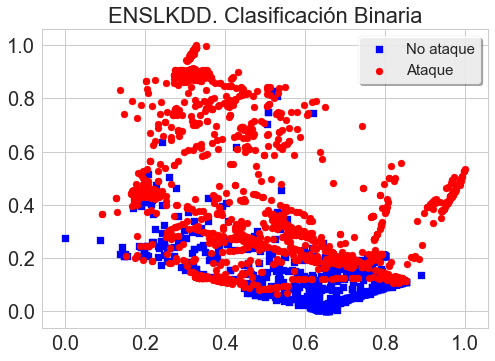

In [89]:
#Binary Classification
plt.rcParams['figure.figsize']= 6.2,6.2
sns.set_style('whitegrid')

plt.scatter(Database[Labels==0][:,0], Database[Labels==0][:,1], label='No ataque', c='blue',
            marker='s')
plt.scatter(Database[Labels==1][:,0], Database[Labels==1][:,1], label='Ataque', c='red')

plt.legend(prop={'size':15},frameon=True,shadow=True)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('ENSLKDD. Clasificación Binaria',fontsize=22)


#ax.yaxis.label.set_size(40)
plt.savefig("./PCA_FP_minmax_ensl_2_classes.png", dpi=300)
plt.show()

# 5 classes

In [90]:
#Reading the labels and converting to numpy
Labels=L_nsl_testing_indexbygroup.values.T
Labels=Labels[0,indice]

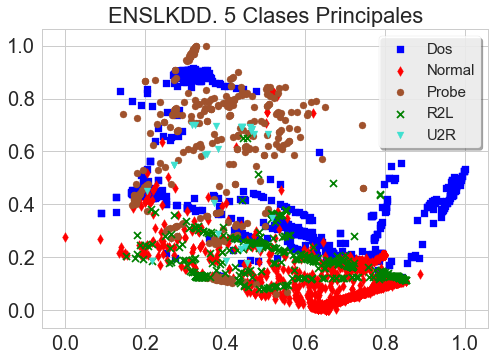

In [91]:
#five classes
plt.rcParams['figure.figsize']= 6.2,6.2
plt.scatter(Database[Labels==1][:,0], Database[Labels==1][:,1], label='Dos', c='blue',marker='s')
plt.scatter(Database[Labels==2][:,0], Database[Labels==2][:,1], label='Normal', c='red',marker='d')
plt.scatter(Database[Labels==3][:,0], Database[Labels==3][:,1], label='Probe', c='sienna',marker='o')
plt.scatter(Database[Labels==4][:,0], Database[Labels==4][:,1], label='R2L', c='green',marker='x')
plt.scatter(Database[Labels==5][:,0], Database[Labels==5][:,1], label='U2R', c='turquoise',marker='v')

plt.legend(prop={'size':15},frameon=True,shadow=True)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('ENSLKDD. 5 Clases Principales',fontsize=22)
plt.savefig("PCA_FP_minmax_ensl_5_classes.png", dpi=300)
plt.show()

# T-SNE MODEL

## 1) T-SNE NSL Training

In [92]:
#Declaring the model
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)

## Binary

In [93]:
#Reading the Dataset
#total=3500
X=nsl_training.values
np.random.seed(8)
indice=np.random.choice(list(range(0,X.shape[0])), total)
X=X[indice,:]
indice

array([70083, 25940, 18417, ..., 85471, 85255, 66997])

In [94]:
#Reading the labels and converting to numpy
Labels=L_nsl_training_indexbinary.values.T
Labels=Labels[0,indice]

In [95]:
#Transormación y normalización del modelo
X = tsne.fit_transform(X)
Database=norm_min_max(X)

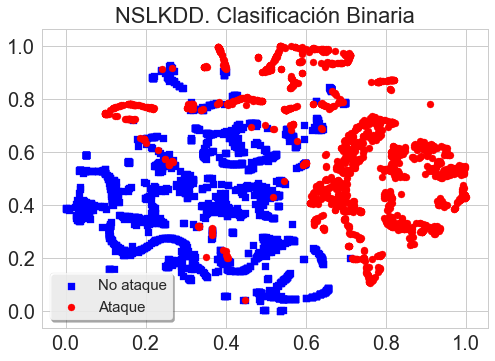

In [96]:
#Binary Classification
plt.rcParams['figure.figsize']= 6.2,6.2
sns.set_style('whitegrid')

plt.scatter(Database[Labels==0][:,0], Database[Labels==0][:,1], label='No ataque', c='blue',
            marker='s')
plt.scatter(Database[Labels==1][:,0], Database[Labels==1][:,1], label='Ataque', c='red')

plt.legend(prop={'size':15},frameon=True,shadow=True)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('NSLKDD. Clasificación Binaria',fontsize=22)


#ax.yaxis.label.set_size(40)
plt.savefig("./TSNE_FP_minmax_nsl_2_classes.png", dpi=300)
plt.show()

## 5 Classes. NSL Training

In [97]:
#Reading the labels and converting to numpy
Labels=L_nsl_training_indexbygroup.values.T
Labels=Labels[0,indice]

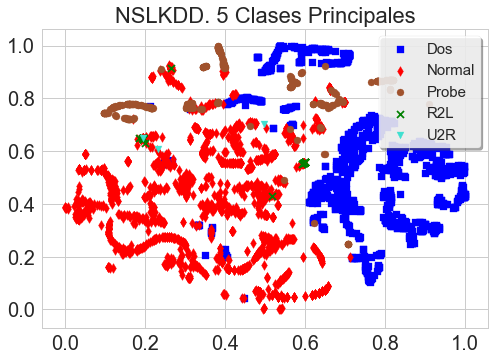

In [98]:
#five classes
plt.rcParams['figure.figsize']= 6.2,6.2
plt.scatter(Database[Labels==1][:,0], Database[Labels==1][:,1], label='Dos', c='blue',marker='s')
plt.scatter(Database[Labels==2][:,0], Database[Labels==2][:,1], label='Normal', c='red',marker='d')
plt.scatter(Database[Labels==3][:,0], Database[Labels==3][:,1], label='Probe', c='sienna',marker='o')
plt.scatter(Database[Labels==4][:,0], Database[Labels==4][:,1], label='R2L', c='green',marker='x')
plt.scatter(Database[Labels==5][:,0], Database[Labels==5][:,1], label='U2R', c='turquoise',marker='v')

plt.legend(prop={'size':15},frameon=True,shadow=True)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('NSLKDD. 5 Clases Principales',fontsize=22)
plt.savefig("TSNE_FP_minmax_nsl_5_classes.png", dpi=300)
plt.show()

## 2.- TSNE - NSL Testing

## Binary

In [99]:
#Reading the Testing Dataset
#total=3500
X=nsl_testing.values
np.random.seed(8)
indice=np.random.choice(list(range(0,X.shape[0])), total)
X=X[indice,:]
indice

array([ 4547, 18417,  2181, ..., 19717,  5270, 22223])

In [100]:
#Reading the labels and converting to numpy
Labels=L_nsl_testing_indexbinary.values.T
Labels=Labels[0,indice]

In [101]:
X = tsne.fit_transform(X)
Database=norm_min_max(X)

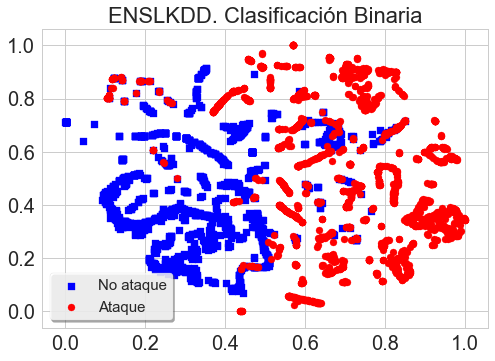

In [102]:
#Binary Classification
plt.rcParams['figure.figsize']= 6.2,6.2
sns.set_style('whitegrid')

plt.scatter(Database[Labels==0][:,0], Database[Labels==0][:,1], label='No ataque', c='blue',
            marker='s')
plt.scatter(Database[Labels==1][:,0], Database[Labels==1][:,1], label='Ataque', c='red')

plt.legend(prop={'size':15},frameon=True,shadow=True)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('ENSLKDD. Clasificación Binaria',fontsize=22)


#ax.yaxis.label.set_size(40)
plt.savefig("./TSNE_FP_minmax_ensl_2_classes.png", dpi=300)
plt.show()

# Five Classes

In [103]:
#Reading the labels and converting to numpy
Labels=L_nsl_testing_indexbygroup.values.T
Labels=Labels[0,indice]

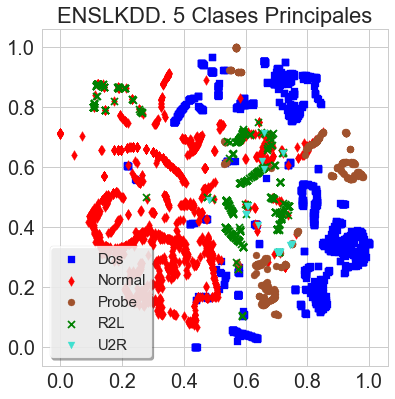

In [106]:
#five classes
plt.rcParams['figure.figsize']= 6.2,6.2
plt.scatter(Database[Labels==1][:,0], Database[Labels==1][:,1], label='Dos', c='blue',marker='s')
plt.scatter(Database[Labels==2][:,0], Database[Labels==2][:,1], label='Normal', c='red',marker='d')
plt.scatter(Database[Labels==3][:,0], Database[Labels==3][:,1], label='Probe', c='sienna',marker='o')
plt.scatter(Database[Labels==4][:,0], Database[Labels==4][:,1], label='R2L', c='green',marker='x')
plt.scatter(Database[Labels==5][:,0], Database[Labels==5][:,1], label='U2R', c='turquoise',marker='v')

plt.legend(prop={'size':15},frameon=True,shadow=True)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('ENSLKDD. 5 Clases Principales',fontsize=22)
plt.savefig("TSNE_FP_minmax_ensl_5_classes.png", dpi=300)
plt.show()